In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("seattle-weather.csv")

In [4]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [6]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [8]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [9]:
df.shape

(1461, 6)

In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


<Axes: xlabel='weather', ylabel='count'>

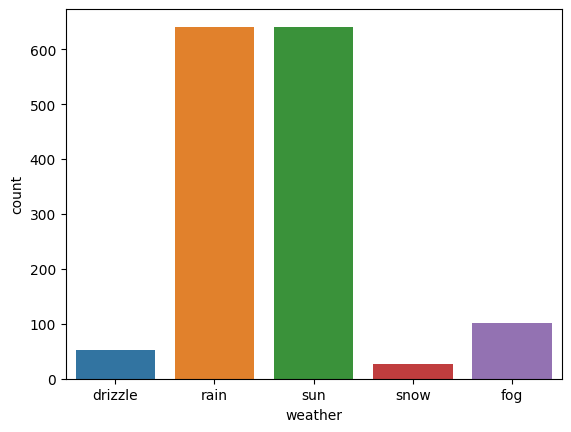

In [11]:
sns.countplot(x=df['weather'])

<Axes: xlabel='precipitation', ylabel='wind'>

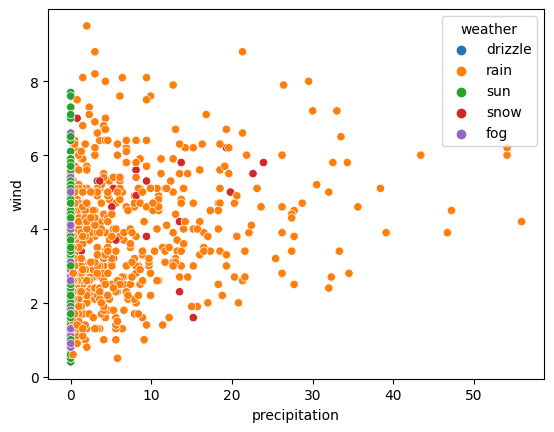

In [12]:
sns.scatterplot(data=df,x="precipitation",y='wind',hue='weather')

<Axes: xlabel='temp_max', ylabel='wind'>

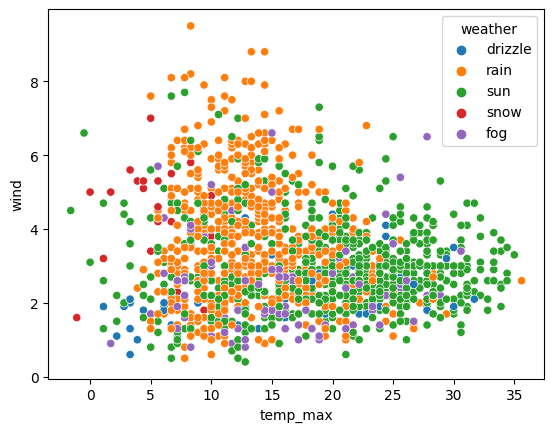

In [13]:
sns.scatterplot(data=df,x="temp_max",y='wind',hue='weather')

<Axes: xlabel='temp_min', ylabel='wind'>

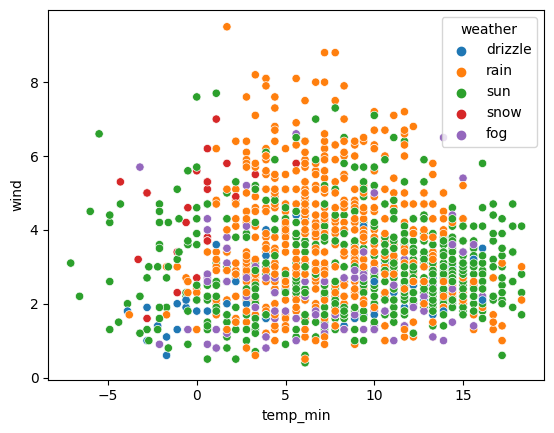

In [14]:
sns.scatterplot(data=df,x="temp_min",y='wind',hue='weather')

<Axes: xlabel='temp_max', ylabel='wind'>

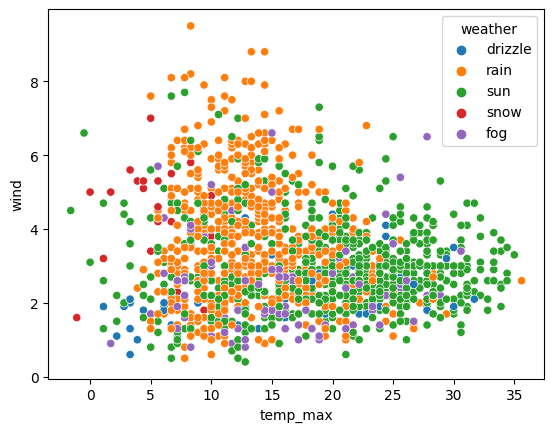

In [15]:
sns.scatterplot(data=df,x="temp_max",y='wind',hue='weather')

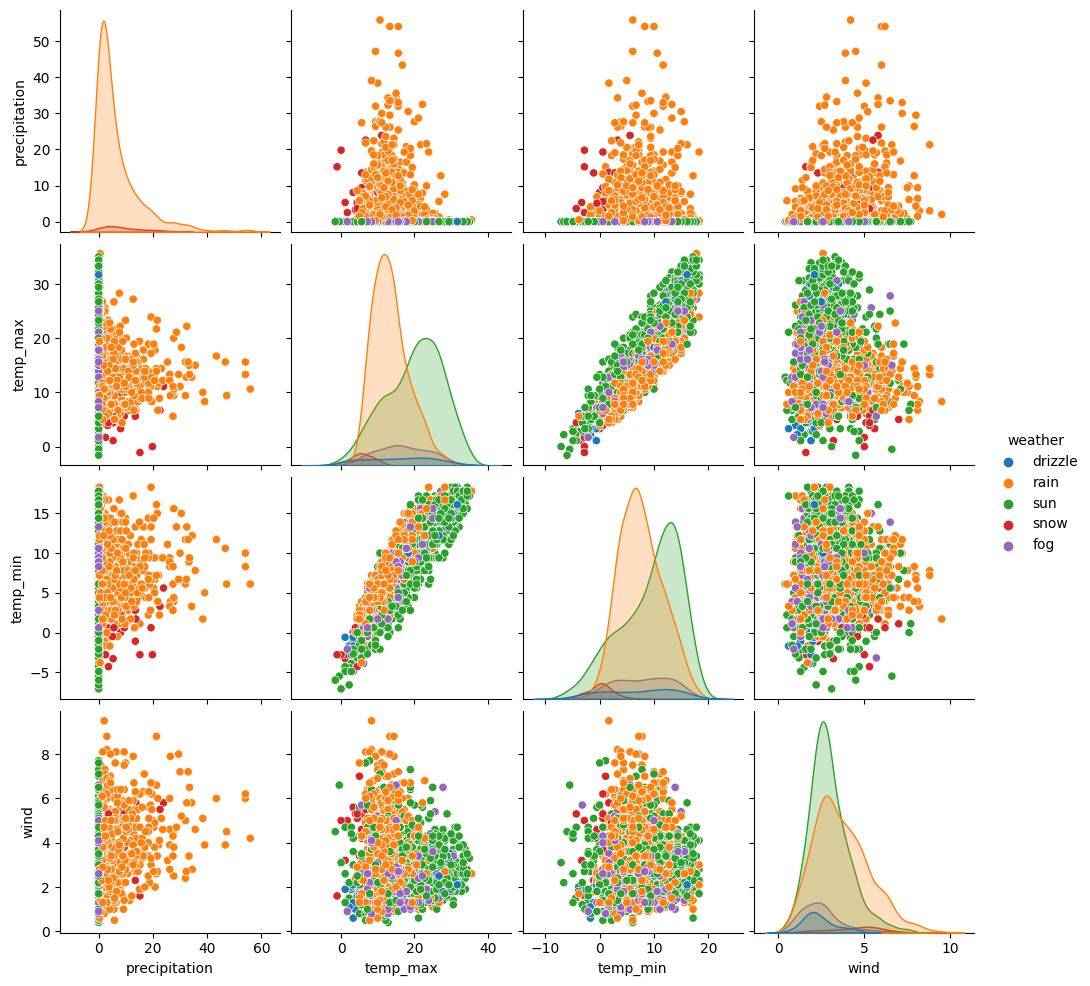

In [16]:
sns.pairplot(df,hue='weather')

In [17]:
df.replace(to_replace ="rain", value = 2, inplace = True)
df.replace(to_replace ="drizzle", value = 3, inplace = True)
df.replace(to_replace ="fog", value = 4, inplace = True)
df.replace(to_replace ="sun", value = 5, inplace = True)
df.replace(to_replace ="snow", value = 1, inplace = True)

In [20]:
x = df.drop(columns=['weather','date'])
y = df['weather']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.46167566828592077
MAE 0.8910122466837543
